# Manipulación de Imagenes

## 1. Librerias

In [ ]:
!pip install matplotlib
!pip install mahotas
!pip install cv
!pip install scikit-image
!pip install opencv-python

  Using cached mahotas-1.4.15-cp312-cp312-win_amd64.whl.metadata (14 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 656.4 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.7 MB 1.5 MB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.7 MB 3.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.4/1.7 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import cv2 as cv2
import io as io
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpi
from PIL import Image
import mahotas
import mahotas.demos

## 2. Lectura

### 2.1. Lectura de imagen en escala de grises con opencv

(-0.5, 511.5, 511.5, -0.5)

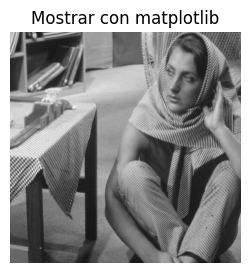

In [ ]:
location="./imagenes/barbara.png"
imagen= cv2.imread(location)

plt.figure(figsize=(3,3))
plt.imshow(imagen)
plt.title("Mostrar con matplotlib")
plt.axis("off")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
location="./imagenes/barbara.png"
imagen= cv2.imread(location)

cv2.imshow('Mostrar con opencv',imagen)
cv2.waitKey(0) # This show a windows
cv2.destroyAllWindows() # Para cerrar ventana

### 2.2. Lectura de imagen a color con opencv

(-0.5, 511.5, 511.5, -0.5)

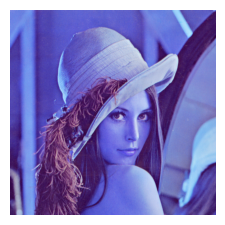

In [ ]:
x="./imagenes/_lena.png"
imagen = cv2.imread(x)
imagen2 = cv2.imread(x,0)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(imagen)
plt.axis("off")


In [ ]:
# Mostrar la imagen usando opencv. Además puede usar hconcat([,,]), resize y putText
x="./imagenes/_lena.png"
imagen = cv2.imread(x)
imagen2 = cv2.imread(x,0)

# Agregar codigo para obtener el resultado esperado

### 2.3. Lectura de imagenes con matplotlib

(-0.5, 511.5, 511.5, -0.5)

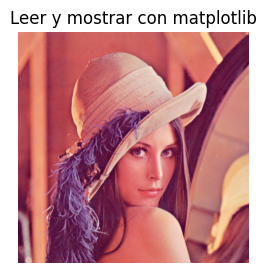

In [ ]:
# Si deseo que lo muestre directamente con Pyplot
imagen=mpi.imread('./imagenes/_lena.png') # Lee RGB
plt.figure(figsize=(3,3))
plt.imshow(imagen)
plt.title("Leer y mostrar con matplotlib")
plt.axis("off")

In [ ]:
# Imagen en escala de grises , mostrar correctamente usando pyplot
imagen=mpi.imread('./imagenes/barbara.png') # Lee RGB


In [ ]:
# Leer con matplotlib y mostrar correctamente con opencv
imagen=mpi.imread('./imagenes/_lena.png') # Lee RGB


### 2.4. Lectura de imagenes con PIL

In [ ]:
# Poder mostrar desde Fotos
im=Image.open('./imagenes/_lena.png')
im.show()

### 2.5. Lectura de archivo de video

In [ ]:
def rescale_frame(frame, op=0, ratio=0.75,W=200,H=100):
    if op==0:
        width = int(frame.shape[1] * ratio)
        height = int(frame.shape[0] * ratio)
        resized_frame= cv2.resize(frame, (width, height), interpolation=cv2.INTER_AREA)
    else:
        resized_frame = cv2.resize(frame, (W, H), interpolation=cv2.INTER_LINEAR)
    return resized_frame

In [ ]:
# Inicializar lectura de archivo de video
vreader = cv2.VideoCapture('./imagenes/Isles of Glencoe.mp4')

#Mostrar el video frame by frame
while True:
    ret, frame = vreader.read()
    if not ret:
        break
    frame = rescale_frame(frame, ratio=0.75)
    cv2.imshow('Mi video', frame) # Mostrar el frame

    # Salimos presionando: x
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

# Liberar el lector de video
vreader.release()
cv2.destroyAllWindows()

### 2.6. Lectura de video en tiempo real

In [ ]:
# Inicializar captura de video en tiempo real solo si tienes una camara instalada



## 3. Crear y grabar

### 3.1. Imagen en escala de grises

(-0.5, 79.5, 79.5, -0.5)

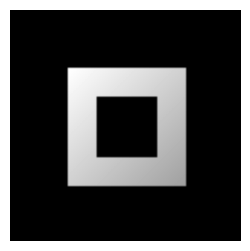

In [ ]:
d=(80,80)
img=np.zeros(d)
for i in range(20,61):
    for j in range(20,61):
        img[i,j]=255-i-j
img[30:51,30:51]=0;
img=np.uint8(img)
plt.figure(figsize=(3,3))
plt.imshow(img,cmap=plt.cm.gray)
plt.axis("off")

### 3.2. Imagen a color

(-0.5, 79.5, 79.5, -0.5)

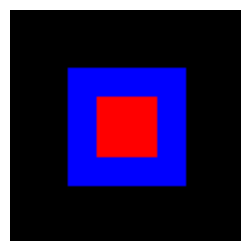

In [ ]:
f=c=80
d=(f,c,3)
img=np.zeros(d,dtype=np.uint8)
for i in range(20,61):
    for j in range(20,61):
        img[i,j,0]=img[i,j,1]=0
        img[i,j,2]=255
img[30:51,30:51,0:3]=[255,0,0];
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis("off")

### 3.3. Grabar imagen

In [ ]:
f=c=80
d=(f,c,3)
img=np.zeros(d,dtype=np.uint8)
img[20:61,20:61,0:3]=[0,0,255]
img[30:51,30:51,0:3]=[255,0,0]
cv2.imwrite('MiImagen.png',img) # Grabar imagen directamente

True

(-0.5, 79.5, 79.5, -0.5)

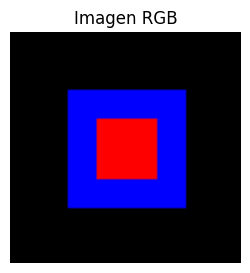

In [ ]:
#Leer la imagen guardada
imagen=cv2.imread('MiImagen.png')
plt.figure(figsize=(3,3))
plt.imshow(imagen)
plt.title("Imagen RGB")
plt.axis("off")

In [ ]:
# Ahora lea la imagen usando opencv y muestrela usando opencv correctamente, utilice resize de  (400,400)
imagen=cv2.imread('MiImagen.png')


In [ ]:
# Poder mostrar desde Fotos imagen generada usando PIL
im=Image.open('MiImagen.png')  # observese que se ha guardado como BGR


### 3.4. Grabar video

In [ ]:
# Inicializar captura de video en tiempo real solo si tienes una camara instalada
camara = 0   # La camara por defecto es cero
vreader = cv2.VideoCapture(camara)

# Crear VideoWriter:
output = 'captura.mp4'
fps = 30  # Frames x segundo
size = (640, 480)  # Frame size
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec para formato MP4
vwriter = cv2.VideoWriter(output, fourcc, fps, size)

while True:
    ret, frame = vreader.read()
    if not ret:
        break
    cv2.imshow('Captura en tiempo real', frame) # Mostrar el frame
    vwriter.write(frame) # Grabamos el frame
    # Salimos presionando: x
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
# Liberar el lector de video
vreader.release()
vwriter.release()
cv2.destroyAllWindows()

## 4.Estructura de una imagen

### 4.1. Tamaño de la imagen.

El número de pixeles de la imagen: filas(alto) x columnas (ancho).

uint8
Dimension: 512 x 512
262144


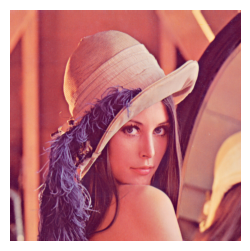

In [ ]:
location="./imagenes/_lena.png"
imagen= cv2.imread(location)

plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis("off")

print(imagen.dtype)
print('Dimension:',imagen.shape[0],'x',imagen.shape[1])  # height x width
print(imagen.shape[0]*imagen.shape[1])  # resolucion   print(int(imagen.size/imagen.ndim))